<a href="https://colab.research.google.com/github/aaryachinnawar/Calculator-website/blob/main/bonus3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,
    mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay, precision_recall_curve,
    RocCurveDisplay, PrecisionRecallDisplay  # Added PrecisionRecallDisplay
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv('customer_churn_dataset-testing-master.csv')


In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_class = classifier.predict(X_test_scaled)
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

# Compute Classification Metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Display Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.00
Precision: 1.00
Recall: 0.99
F1-score: 1.00
ROC-AUC: 1.00
Confusion Matrix:
[[6792    1]
 [  42 6040]]


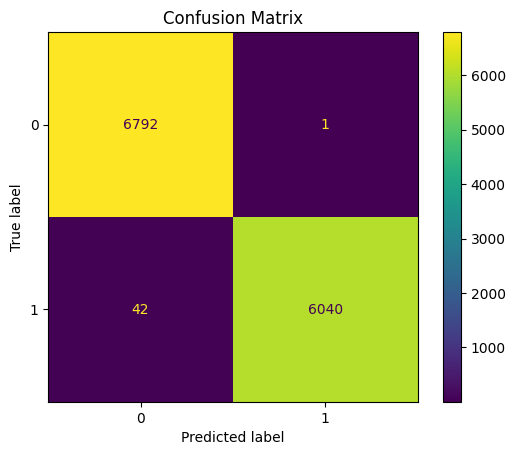

In [ ]:
# Plot Confusion Matrix
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

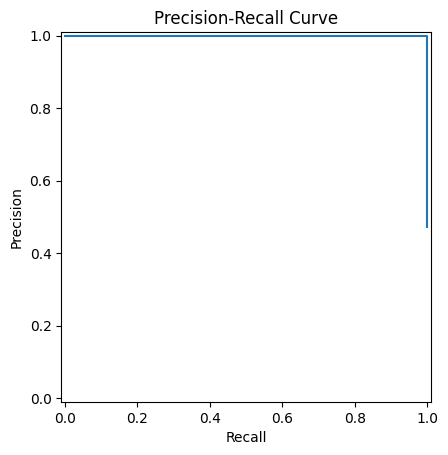

NameError: name 'roc_curve' is not defined

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title("Precision-Recall Curve")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_pred_proba)).plot()
plt.title("ROC Curve")
plt.show()